In [1]:
import pandas as pd

url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_b8cfaac90a3e44faa6c943a2486889d0.csv"
df=pd.read_csv(url)
df.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,CZ_TIMEZONE,MAGNITUDE_TYPE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,FLOOD_CAUSE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,36754,NORTHERN SAN JOAQUIN VALLEY (ZONE),,05/08/2007,0,Excessive Heat,,,0,0,0,0,CA,PST-8,,6278,Z,19,STO,0,0,ASOS,,,,,,,,,05/08/2007,2359,,,,,The daily high temperature record of 98 degree...,High pressure over the region brought unseason...,1
1,53471,NORTHERN SACRAMENTO VALLEY (ZONE),,07/04/2007,0,Excessive Heat,,,1,1,0,0,CA,PST-8,,8435,Z,15,STO,0,0,Newspaper,,,,,,,,,07/04/2007,2359,,,,,A Shasta County woman died of heat stroke on J...,High pressure over the western United States b...,2
2,52840,SAN BERNARDINO COUNTY MOUNTAINS (ZONE),,07/04/2007,900,Excessive Heat,,,0,0,0,0,CA,PST-8,,9401,Z,55,SGX,0,0,COOP Observer,,,,,,,,,07/06/2007,1400,,,,,NaN,"Strong high pressure aloft, large scale subsid...",3
3,52838,RIVERSIDE COUNTY MOUNTAINS (ZONE),,07/04/2007,900,Excessive Heat,,,0,0,0,0,CA,PST-8,,9401,Z,56,SGX,0,0,COOP Observer,,,,,,,,,07/06/2007,1400,,,,,NaN,"Strong high pressure aloft, large scale subsid...",4
4,52837,SAN DIEGO COUNTY MOUNTAINS (ZONE),,07/04/2007,900,Excessive Heat,,,0,0,0,0,CA,PST-8,,9401,Z,58,SGX,0,0,COOP Observer,,,,,,,,,07/06/2007,1400,,,,,NaN,"Strong high pressure aloft, large scale subsid...",5


In [2]:
df.shape

(438, 39)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EVENT_ID             438 non-null    int64 
 1   CZ_NAME_STR          438 non-null    object
 2   BEGIN_LOCATION       438 non-null    object
 3   BEGIN_DATE           438 non-null    object
 4   BEGIN_TIME           438 non-null    int64 
 5   EVENT_TYPE           438 non-null    object
 6   MAGNITUDE            438 non-null    object
 7   TOR_F_SCALE          438 non-null    object
 8   DEATHS_DIRECT        438 non-null    int64 
 9   INJURIES_DIRECT      438 non-null    int64 
 10  DAMAGE_PROPERTY_NUM  438 non-null    int64 
 11  DAMAGE_CROPS_NUM     438 non-null    int64 
 12  STATE_ABBR           438 non-null    object
 13  CZ_TIMEZONE          438 non-null    object
 14  MAGNITUDE_TYPE       438 non-null    object
 15  EPISODE_ID           438 non-null    int64 
 16  CZ_TYPE 

In [2]:
# Convert the "BEGIN_DATE" and "END_DATE" columns to datetime64[ns] format so that we could perform mathematical operations on these two columns.
df['BEGIN_DATE']= pd.to_datetime(df['BEGIN_DATE'])
df['END_DATE']= pd.to_datetime(df['END_DATE'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EVENT_ID             438 non-null    int64         
 1   CZ_NAME_STR          438 non-null    object        
 2   BEGIN_LOCATION       438 non-null    object        
 3   BEGIN_DATE           438 non-null    datetime64[ns]
 4   BEGIN_TIME           438 non-null    int64         
 5   EVENT_TYPE           438 non-null    object        
 6   MAGNITUDE            438 non-null    object        
 7   TOR_F_SCALE          438 non-null    object        
 8   DEATHS_DIRECT        438 non-null    int64         
 9   INJURIES_DIRECT      438 non-null    int64         
 10  DAMAGE_PROPERTY_NUM  438 non-null    int64         
 11  DAMAGE_CROPS_NUM     438 non-null    int64         
 12  STATE_ABBR           438 non-null    object        
 13  CZ_TIMEZONE          438 non-null  

In [3]:
# Subtract the "END_DATE" from "BEGIN_DATE" to get the duration of the heat waves in Timedelta format.
df["DURATION"]=df['END_DATE']-df['BEGIN_DATE']

In [7]:
# Convert the Timedelta format into hours and add the "END_TIME" hours to get the total hours of the heat waves: how many hours did each heat wave lasted
import numpy as np
df["DURATION"]=(df['DURATION'] / np.timedelta64(1, 'h')+(df["END_TIME"]/2400)*24).astype(float)

In [8]:
# Extract "YEAR" from the dates
import datetime
df["YEAR"]=pd.DatetimeIndex(df["BEGIN_DATE"]).year

In [9]:
# Let's count that for each year, how many days were marked as having excessive heat.
summary1=pd.DataFrame(df.groupby("YEAR")["EVENT_ID"].count()).reset_index().rename(columns={"EVENT_ID":"#_OF_DAYS_W/_EXCESSIVE_HEAT"})
summary1

,YEAR,#_OF_DAYS_W/_EXCESSIVE_HEAT
0,2007,36
1,2008,19
2,2011,1
3,2013,16
4,2014,1
5,2016,23
6,2017,49
7,2018,64
8,2019,87
9,2020,142


In [10]:
# In the past few years, the number of days that were marked as having excessive heat had definitely increased, especially 2020. Let's visualize that.
import plotly.express as px
fig = px.bar(summary1, x='YEAR', y='#_OF_DAYS_W/_EXCESSIVE_HEAT', title="California is getting hotter and hotter")
fig.show()

##### The number of days with excessive heat has been increasing in recent years. In 2020, there were 142 days with excessive heat.

##### Let's visualize the duration of the days with excessive heat.

In [11]:
# Calculate the average duration of heat waves for each year.
summary2=pd.DataFrame(df.groupby("YEAR")["DURATION"].mean()).rename(columns={"DURATION":"AVERAGE_DURATION_IN_HRS"}).reset_index()
summary2

,YEAR,AVERAGE_DURATION_IN_HRS
0,2007,40.778611
1,2008,25.578947
2,2011,140.000000
3,2013,28.985625
4,2014,13.000000
5,2016,46.130435
6,2017,45.775510
7,2018,61.625000
8,2019,50.044828
9,2020,79.370211


##### Duration of heat waves had been on an upward trend in the past few years.

In [12]:
fig = px.bar(summary2, x='YEAR', y='AVERAGE_DURATION_IN_HRS', title="AVERAGE DURATION OF HEAT WAVES IN CALIFORNIA")
fig.show()

##### Since 2012, average duration of heat waves in California shows an upward trend. In the 8 years, heat wave lasted longer and longer each year.

In [13]:
df[df["DURATION"]>48].groupby("YEAR")["EVENT_ID"].count()

YEAR
2007    11
2011     1
2013     3
2016    13
2017    20
2018    43
2019    31
2020    95
Name: EVENT_ID, dtype: int64

##### Most of the heat waves that lasted for more than 2 days occured in recent years.

##### The hottest county in California.

In [14]:
summary3=pd.DataFrame(df.groupby("CZ_NAME_STR")["EVENT_ID"].count()).rename(columns={"EVENT_ID":"NUMBER_OF_DAYS_W/_EXCESSIVE_HEAT"}).reset_index().sort_values(by="NUMBER_OF_DAYS_W/_EXCESSIVE_HEAT",ascending=False)
summary3

,CZ_NAME_STR,NUMBER_OF_DAYS_W/_EXCESSIVE_HEAT
9,COACHELLA VALLEY (ZONE),27
49,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,25
55,SAN DIEGO COUNTY VALLEYS (ZONE),19
53,SAN DIEGO COUNTY DESERTS (ZONE),19
11,DEATH VALLEY NATIONAL PARK (ZONE),18
...,...,...
70,SOUTH CENTRAL SISKIYOU COUNTY (ZONE),1
14,EASTERN KERN COUNTY (ZONE),1
4,CENTRAL SIERRA FOOTHILLS (ZONE),1
58,SAN FRANCISCO PENINSULA COAST (ZONE),1


In [15]:
fig = px.bar(summary3, y="CZ_NAME_STR", x="NUMBER_OF_DAYS_W/_EXCESSIVE_HEAT", orientation='h',color="CZ_NAME_STR",title="Hottest county in California")
fig.update_layout(width=1500,height=2000,showlegend=False)
fig.show()

##### Let's generate a word cloud of the "EPISODE_NARRATIVE" column.

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

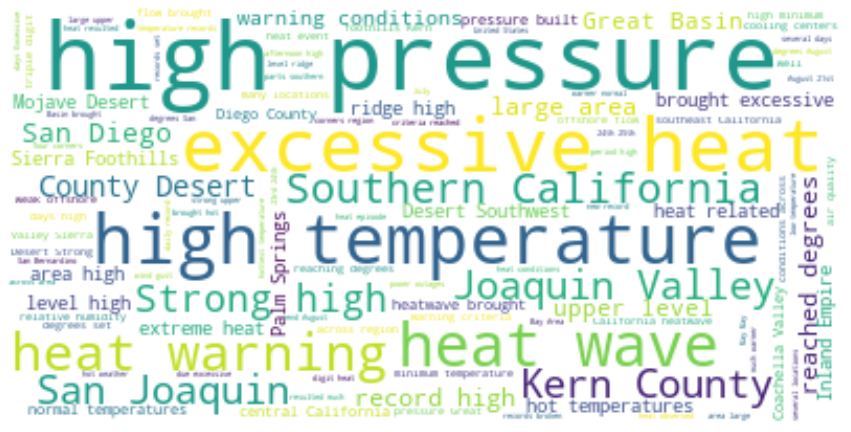

In [23]:
stopwords = set(STOPWORDS)
plt.subplots(figsize = (15,15))
narrative = WordCloud(
    background_color='white',
    max_words=5000,
    stopwords=stopwords).generate(' '.join(df["EPISODE_NARRATIVE"]))
plt.imshow(narrative, interpolation='bilinear')
plt.axis('off')
plt.show()

##### From the world cloud, we see that the phrase "high pressure" occurs most often in the narrative of each heat wave episode. Also, excessive heat seemed to have concentrated in "Southern California".

#### Conclusion:

##### The number of days in California that were marked as having excessive heat had been increasing. At the same time, the average duration of the heat waves had been on an overall upward trend. In other words, California is getting hotter and hotter and it is taking more and more time for that excessive heat to cool off. The most frequent phrase in the narrative for each excessive heat episode was "high pressure". The major cause for those heat waves had been "high pressure", which is a direct result of increased level of carbon dioxide in the atmosphere.

##### Certainly, climate change is still a hoax, right? 